In [2]:
#### 读取centier软件所确定的着丝粒区域 ####
library(dplyr)
Nip_cen_region_df <- read.csv("/public/home/cszx_huangxh/qiujie/collabrators/gulei/cen_analysis/cen_define_2.0/Nip/CentIER_final_results/Nip_genome.fa_centromere_range.txt",sep ="\t",header = FALSE)
Zpal_cen_region_df <- read.csv("/public/home/cszx_huangxh/qiujie/collabrators/gulei/cen_analysis/cen_define_2.0/Zpal/CentIER_final_results/Zpal_genome.fa_centromere_range.txt",sep ="\t",header = FALSE)
Nip_cen_region_df <- Nip_cen_region_df %>% mutate(Species='Nip') %>% select(Species,everything()) %>%
  mutate(V1=gsub("Chr([1-9])$","Chr0\\1",V1)) %>%
  rename(Chr=V1,CE_start=V2,CE_end=V3) 
Zpal_cen_region_df <- Zpal_cen_region_df %>% mutate(Species='Zpal') %>% select(Species,everything()) %>%
  mutate(V1=gsub("Chr([1-9])$","Chr0\\1",V1)) %>%
  rename(Chr=V1,CE_start=V2,CE_end=V3) 
combined_region_df <- bind_rows(Zpal_cen_region_df,Nip_cen_region_df)

#### 读取染色体长度csv文件 ####
Zpal_chr_length <- read.csv("/public/home/cszx_huangxh/qiujie/collabrators/gulei/genome_data/Zpal_chromosome_lengths.csv",sep = ",",header = FALSE)
Nip_chr_length <- read.csv("/public/home/cszx_huangxh/qiujie/collabrators/gulei/genome_data/Nip_chromosome_lengths.csv",sep = ",",header = FALSE)
colnames(Zpal_chr_length) <- c("Species","Chr","chr_length")
colnames(Nip_chr_length) <- c("Species","Chr","chr_length")
combined_chr_length <- bind_rows(Zpal_chr_length,Nip_chr_length)

## 合并 ##
combined_position_df <- merge(combined_chr_length,combined_region_df,by = c("Species", "Chr")) %>%
  mutate( CEN_length = CE_end- CE_start)


combined_position_df <- combined_position_df %>%
  mutate(P_ratio = CE_start / (chr_length - CE_end),
         N_ratio = (chr_length - CE_end) / CE_start,
         LS_ratio = pmax(P_ratio, N_ratio))# 取较大者
         
combined_position_df 
write.table(combined_position_df,"combined_position.txt",row.names = TRUE,sep = "\t")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Species,Chr,chr_length,CE_start,CE_end,CEN_length,P_ratio,N_ratio,LS_ratio
<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Nip,Chr01,43929697,16610000,17720000,1110000,0.6337349,1.5779468,1.577947
Nip,Chr02,36447916,13300000,14500000,1200000,0.6059801,1.6502192,1.650219
Nip,Chr03,37399924,19830000,20820000,990000,1.1960248,0.8361031,1.196025
Nip,Chr04,36078568,9650000,10600000,950000,0.3787497,2.6402661,2.640266
Nip,Chr05,30400764,12200000,12920000,720000,0.6979100,1.4328495,1.432850
Nip,Chr06,32122276,15330000,16540000,1210000,0.9838101,1.0164564,1.016456
Nip,Chr07,29936421,11930000,12870000,940000,0.6990335,1.4305466,1.430547
Nip,Chr08,28605474,12690000,13380000,690000,0.8334716,1.1998009,1.199801
Nip,Chr09,27474823,6271892,7704786,1432894,0.3172423,3.1521648,3.152165


In [3]:
##### 读取TRASH (-max.div 5 参数以获得最大分割单体 )得到的summary结果文件 ####
library(dplyr)

# 读取两个 CSV 文件
repeats_df_Zpal <- read.csv("/public/home/cszx_huangxh/qiujie/collabrators/gulei/cen_analysis/CenTools/cen/Zpal/Zpal_HOR/all.repeats.from.Zpal_genome.fa.csv")
repeats_df_Nip <- read.csv('/public/home/cszx_huangxh/qiujie/collabrators/gulei/cen_analysis/CenTools/cen/Nip/Nip_HOR/all.repeats.from.Nip_genome.fa.csv')

# 添加 Species 列并重新排序 
####TRASH 软件会涉及二次修正，所以在allrepats csv文件中表现为 识别到的class中 部分两行会有两个重复（上一行的start/end和下一行的start/end 相同或非常接近，需要去除前者，保留后者）####
repeats_df_Zpal <- repeats_df_Zpal %>% mutate(Species='Zpal') %>% select(Species, everything()) %>% 
  rename(Chr=seq.name) %>%
  filter(!(abs(start - lead(start)) <= 5 | abs(end - lead(end)) <= 5))
repeats_df_Nip <- repeats_df_Nip %>% mutate(Species='Nip') %>% select(Species, everything()) %>% 
  rename(Chr=seq.name) %>%
  filter(!(abs(start - lead(start)) <= 5 | abs(end - lead(end)) <= 5))


In [4]:
Cent_df_Nip <- repeats_df_Nip %>% filter(width >= 140 & width <=170 & edit.distance <= 50  ) # & edit.distance <= 50
Cent_CE_df_Nip <- merge(Cent_df_Nip,combined_position_df,by = c("Species","Chr")) %>%
  select(Species,Chr,start,end,width,chr_length,CE_start,CE_end,CEN_length,class,edit.distance,strand,everything())


Cent_df_Zpal <- repeats_df_Zpal %>% filter(width >= 135 & width <=155 & edit.distance <= 50 ) # & edit.distance <= 50
Cent_CE_df_Zpal <- merge(Cent_df_Zpal,combined_position_df,by = c("Species","Chr")) %>%
  select(Species,Chr,start,end,width,chr_length,CE_start,CE_end,class,edit.distance,strand,everything())


combined_Cent_CE_df <- bind_rows(Cent_CE_df_Nip,Cent_CE_df_Zpal)
Cent_CE_df_Zpal 


Species,Chr,start,end,width,chr_length,CE_start,CE_end,class,edit.distance,strand,seq,region.name,repetitiveness,CEN_length,P_ratio,N_ratio,LS_ratio
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Zpal,Chr01,47116308,47116453,146,109217070,49200001,51200000,CEN144,31,+,GATAATTGGGCACATTTTTGAACTTTTTTGTTCCAGAAGCGAACTTTTTGATTCTTGTATGTTACAGTTGTCGTCTATGTCACCACATTCATGTCCGAAACAGAAACATTAGAAACACATCCTTTGTTACTATTACACCATATTAG,Zpal_genome.fa_Chr01,453,1999999,0.8480263,1.179209,1.179209
Zpal,Chr01,47116454,47116596,143,109217070,49200001,51200000,CEN144,36,+,GATTACTAGGCACGATTTTAACCTTTTGTTCAAGAAGCGAAGTTTTCATTCTTGCAAGTTATGGGTGTCGTCTATTTTGCAAACTTTGTGTACGGATCGGAAATGCTAGAAACACTCACTTGGTACTTTTACACCATATTACG,Zpal_genome.fa_Chr01,1055,1999999,0.8480263,1.179209,1.179209
Zpal,Chr01,47116597,47116740,144,109217070,49200001,51200000,CEN144,29,+,GTTATTTGGCACATTTTTGAACTTTTTTGTTCCGGATGCGAACTTTTGATTCTTGCATGTTATTGGTGCCGTCTATTTCACAACATTCGTGTTCGGAACGGAAACATTAGAAACACATACTTTGTTACTATTATACCATATTAG,Zpal_genome.fa_Chr01,1223,1999999,0.8480263,1.179209,1.179209
Zpal,Chr01,47116741,47116884,144,109217070,49200001,51200000,CEN144,41,+,GATGATTGGACATGTTTATGATCCTTTTCATTCGAGAAGCGAAGTTTTAATCTTGCAAGTTAGGGCTGCTGTTTATTTCGCAAACTCTGTGTAAGGATCGAAAATTCTATAAACACTAACTTGCTACTTCTACACGATATTACG,Zpal_genome.fa_Chr01,1140,1999999,0.8480263,1.179209,1.179209
Zpal,Chr01,47116885,47117029,145,109217070,49200001,51200000,CEN144,32,+,GTTATTTGGCACATTTTTGAACGTTTTTGTTCCGGGAGCAAACTTTTGATTCTTGCATGTTACGGGTGCCATCTATTTCACAACCATCGCTTTCCGGAACGGAAACGTTAGAAACACATCCTTTGTTATTATTACACCATATTAC,Zpal_genome.fa_Chr01,754,1999999,0.8480263,1.179209,1.179209
Zpal,Chr01,47117030,47117173,144,109217070,49200001,51200000,CEN144,31,+,GCTGATTGGACATGTTTATGAACCTTTTTGTTCTGGAAGCGAAGTTTTACTCTTTCAAGTTATGGGTGTCGTCTATTTCGCAAACTTTGTGTATGGAATGGAAATGCTAGAAACACATCAGTTGGTAGTATTACACCATATTTC,Zpal_genome.fa_Chr01,857,1999999,0.8480263,1.179209,1.179209
Zpal,Chr01,47117410,47117553,144,109217070,49200001,51200000,CEN144,28,+,GTTTATTTGTCACATTTTGAACTTTTTTGTTTCGGAAGCGAACTTTTGATTCTTGCATGTTACGGGTGTCGTCTATTTCACAACATTCGTGTACAGAACGAAAACGTTAGAAACACAACCTTTGTTACTATTACACCATATTAG,Zpal_genome.fa_Chr01,1192,1999999,0.8480263,1.179209,1.179209
Zpal,Chr01,47117554,47117697,144,109217070,49200001,51200000,CEN144,33,+,GATGATTGGACATGTTTATGAACATTTTTGTTCCAGAAGCGAAGTTTTAATCTTATGAGTTACTGGTGTCGTCTATTTCGCAAACTTTCTGTACAGAACGGAAATGCTTGAAACACTCACTTGGTACTTCTACACCATATTACG,Zpal_genome.fa_Chr01,1134,1999999,0.8480263,1.179209,1.179209
Zpal,Chr01,47117698,47117840,143,109217070,49200001,51200000,CEN144,33,+,GTTATCTGGCACATTTTTGAACTTTTTTTTTCGAAAGCGAACTTTTGATTCTTGCATGTTATGGATGTCGTCTATTTCGCTACATTCGTGTCCGGAACGGAAACGATAGAAACACATCTTTTGTTACTATTACTTCATATTAT,Zpal_genome.fa_Chr01,403,1999999,0.8480263,1.179209,1.179209


In [5]:

library(dplyr)

library(dplyr)

# Group by Species and Chr to get the unique chr_length, then sum widths and unique chr_lengths
result <- combined_Cent_CE_df %>%
  group_by(Species, Chr) %>%
  summarise(unique_chr_length = unique(chr_length), .groups = 'drop') %>%
  group_by(Species) %>%
  summarise(
    Cent_Size = sum(combined_Cent_CE_df$width[combined_Cent_CE_df$Species == Species], na.rm = TRUE),
    genome_size = sum(unique_chr_length),
    ratio = Cent_Size / genome_size
  )
result

Warning message:
“There were 2 warnings in `summarise()`.
The first warning was:
ℹ In argument: `Cent_Size = sum(...)`.
ℹ In group 1: `Species = "Nip"`.
Caused by warning in `combined_Cent_CE_df$Species == Species`:
! longer object length is not a multiple of shorter object length
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


Species,Cent_Size,genome_size,ratio
<chr>,<int>,<int>,<dbl>
Nip,4862714,385710679,0.01260715
Zpal,50992652,1413339067,0.03607956


In [6]:
Zpal_total_cent_size <- Cent_CE_df_Zpal %>%
  summarise(Zpal_cent_size = sum(width, na.rm = TRUE))
Zpal_total_cent_size

Zpal_cent_size
<int>
50992652


In [7]:
# 转座子密度数据预处理
library(tidyr)
Nip_TE_data <- read.table("Nip_genome.fa.mod.EDTA.TEanno.gff3")
Zpal_TE_data <- read.table("Zpal_genome.fa.mod.EDTA.TEanno.gff3")
Zpal_TE_data <- Zpal_TE_data %>% separate(V9,into = c('ID','Name','classification','sequence_ontology','identity','method'),sep=';',extra="merge")
Nip_TE_data <- Nip_TE_data %>% separate(V9,into = c('ID','Name','classification','sequence_ontology','identity','method'),sep=';',extra = "merge")



In [8]:
library(dplyr)

# 核型数据处理，着丝粒区域
Zpal_position_df <- combined_position_df %>%
  filter(Species=="Zpal") %>%
  mutate( Start = as.numeric(0)) %>%
  rename(End=chr_length) %>%
  select(Chr,Start,End,CE_start,CE_end)
Zpal_position_df$Chr <- as.numeric(gsub("Chr","",Zpal_position_df$Chr))

window_size <- 1e6 # 
#Zpal_LTR_data <- Zpal_TE_data %>%
#  filter(grepl("LTR",Zpal_TE_data$classification))

# 创建包含每个窗口的转座子密度表
Zpal_TE_density <- Zpal_TE_data %>%
group_by(V1) %>%
mutate(te_end = max(V5)) %>%
ungroup() %>%
  mutate(Start = floor(V4 / window_size) * window_size + 1,  # 窗口开始位置
         
         End = pmin(Start + window_size - 1,te_end),                      # 窗口结束位置
         Chr = V1) %>%
  group_by(Chr, Start, End) %>%
  summarise(Value = n(),.groups = "drop") %>%                                 # 统计每个窗口的转座子数量
  ungroup() 
Zpal_TE_density$Chr <- as.numeric(gsub("Chr","",Zpal_TE_density$Chr)) 
# new_max_row <- data.frame(Chr = 1, Start = -3, End = -2, Value = 3400) # 规定热图最大值
# new_min_row <- data.frame(Chr = 1, Start = -2, End = -1, Value = 0)
# Zpal_TE_density <- rbind(Zpal_TE_density, new_max_row, new_min_row)


window_size_2 <- 5e4
sat_density_Cent_CE_df_Zpal <-  Cent_CE_df_Zpal %>%
  group_by(Chr) %>%
  mutate(sat_end = max(end)) %>%
  ungroup() %>%
  mutate(Start = floor(start / window_size_2) * window_size_2 + 1,  # 计算窗口起点
         End = pmin(Start + window_size_2 - 1, sat_end),           # 计算窗口终点，确保不超过长度
         Chr = Chr) %>%
  group_by(Chr, Start, End) %>%
  summarise(Value = n(),         # 统计每个窗口内的卫星序列数量 
            .groups = "drop") %>%
  ungroup() %>%
  mutate(Color="33a02c") #
   
sat_density_Cent_CE_df_Zpal$Chr <- as.numeric(gsub("Chr","",  sat_density_Cent_CE_df_Zpal$Chr))



In [9]:
print(unique(max(Zpal_TE_density$Value)))


[1] 3326


In [10]:
library(dplyr)
Zpal_gene_data <- read.table("/public/home/cszx_huangxh/qiujie/collabrators/gulei/genome_data/Zpal_gene.gff3",sep = "\t")
window <- 1e6 # 
#Zpal_LTR_data <- Zpal_TE_data %>%
#  filter(grepl("LTR",Zpal_TE_data$classification))

# 创建包含每个窗口的转座子密度表
Zpal_gene_density <- Zpal_gene_data %>%
group_by(V1) %>%
mutate(gene_end = max(V5)) %>%
ungroup() %>%
  mutate(Start = floor(V4 / window) * window + 1,  # 窗口开始位置
         
         End = pmin(Start + window - 1,gene_end),                      # 窗口结束位置
         Chr = V1) %>%
  group_by(Chr, Start, End) %>%
  summarise(Value = n(),.groups = "drop") %>%                                 # 统计每个窗口的转座子数量
  ungroup() 
Zpal_gene_density$Chr <- as.numeric(gsub("Chr","",Zpal_gene_density$Chr)) 
Zpal_gene_density

Warning message:
“NAs introduced by coercion”


Chr,Start,End,Value
<dbl>,<dbl>,<dbl>,<int>
1,1,1.0e+06,1532
1,1000001,2.0e+06,1584
1,2000001,3.0e+06,1798
1,3000001,4.0e+06,1924
1,4000001,5.0e+06,1698
1,5000001,6.0e+06,1502
1,6000001,7.0e+06,1724
1,7000001,8.0e+06,1746
1,8000001,9.0e+06,1476


In [11]:
library(paletteer)
library(ggthemes)
library(RIdeogram)

ideogram(
  karyotype = Zpal_position_df, overlaid = Zpal_TE_density,
  label = sat_density_Cent_CE_df_Zpal,label_type = "line",
  output = './chr_map/Zpal_chr_map.svg',
  Lx=20,Ly=15,colorset1 =  c("#91bfdb", "#ffffbf", "#fc8d59")) 
convertSVG('./chr_map/Zpal_chr_map.svg',file ='./chr_map/Zpal_chr_map',device = 'pdf')

Warning message in checkValidSVG(doc, warn = warn):
“This picture may not have been generated by Cairo graphics; errors may result”


In [12]:
# 转座子密度数据预处理
library(tidyr)
Nip_TE_data <- read.table("/public/home/cszx_huangxh/qiujie/collabrators/gulei/cen_analysis/DeepTE.2/Nip/Nip_genome.fa.mod.EDTA.TEanno.gff3")
Nip_TE_data <- Nip_TE_data %>% separate(V9,into = c('ID','Name','classification','sequence_ontology','identity','method'),sep=';',extra = "merge")
library(dplyr)

# 核型数据处理，着丝粒区域
Nip_position_df <- combined_position_df %>%
  filter(Species=="Nip") %>%
  mutate( Start = as.numeric(0)) %>%
  rename(End=chr_length) %>%
  select(Chr,Start,End,CE_start,CE_end)
Nip_position_df$Chr <- as.numeric(gsub("Chr","",Nip_position_df$Chr))

window_size <- 1e6 # 

# 创建包含每个窗口的转座子密度表
Nip_TE_density <- Nip_TE_data %>%
group_by(V1) %>%
mutate(te_end = max(V5)) %>%
ungroup() %>%
  mutate(Start = floor(V4 / window_size) * window_size + 1,  # 窗口开始位置
         
         End = pmin(Start + window_size - 1,te_end),                      # 窗口结束位置
         Chr = V1) %>%
  group_by(Chr, Start, End) %>%
  summarise(Value = n(),.groups = "drop") %>%                                 # 统计每个窗口的转座子数量
  ungroup() 

Nip_TE_density$Chr <- as.numeric(gsub("Chr","",Nip_TE_density$Chr)) 
new_max_row <- data.frame(Chr = 1, Start = -3, End = -2, Value = 3326)
new_min_row <- data.frame(Chr = 1, Start = -2, End = -1, Value = 0)
Nip_TE_density <- rbind(Nip_TE_density, new_max_row, new_min_row)

window_size_2 <- 5e4
sat_density_Cent_CE_df_Nip <-  Cent_CE_df_Nip %>%
  group_by(Chr) %>%
  mutate(sat_end = max(end)) %>%
  ungroup() %>%
  mutate(Start = floor(start / window_size_2) * window_size_2 + 1,  # 计算窗口起点
         End = pmin(Start + window_size_2 - 1, sat_end),           # 计算窗口终点，确保不超过长度
         Chr = Chr) %>%
  group_by(Chr, Start, End) %>%
  summarise(Value = n(),         # 统计每个窗口内的卫星序列数量 
            .groups = "drop") %>%
  ungroup() %>%
  mutate(Color="33a02c") #
  
sat_density_Cent_CE_df_Nip$Chr <- as.numeric(gsub("Chr","",  sat_density_Cent_CE_df_Nip$Chr))

library(paletteer)
library(ggthemes)
library(RIdeogram)

ideogram(
  karyotype = Nip_position_df, overlaid = Nip_TE_density,
  label = sat_density_Cent_CE_df_Nip,label_type = "line",
  output = './chr_map/Nip_chr_map.svg',
  Lx=20,Ly=15,colorset1 = c("#91bfdb", "#ffffbf", "#fc8d59")) 
convertSVG('./chr_map/Nip_chr_map.svg',file ='./chr_map/Nip_chr_map',device = 'pdf')



Warning message in checkValidSVG(doc, warn = warn):
“This picture may not have been generated by Cairo graphics; errors may result”


In [7]:
# Zpal<- merge(combined_chr_length,repeats_df_Zpal,by = c("Species", "Chr")) 

# # 筛选width在135bp到170bp之间，并且class包含"CEN"的行
# filtered_df <- Zpal %>%
#   filter(width >= 135, width <= 170)

# # 根据edit.distance分类
# filtered_df <- filtered_df %>%
#   mutate(category = case_when(
#     !is.na(edit.distance) & edit.distance < 50 ~ "Cent",
#     !is.na(edit.distance) & edit.distance >= 50 ~ "Cent-like",
#     is.na(edit.distance) ~ "non-cent"
#   ))

# # 为每条染色体添加末端信息
# chromosome_lengths <- repeats_df_Zpal %>%
#   group_by(Chr) %>%
#   summarise(chr_length = max(end))

# # 将末端信息合并回原数据框
# filtered_df <- filtered_df %>%
#   left_join(chromosome_lengths, by = "Chr")

# # 显示处理结果
# filtered_df


Species,Chr,chr_length.x,start,end,width,seq,strand,class,region.name,edit.distance,repetitiveness,category,chr_length.y
<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>
Zpal,Chr01,109217070,45131,45269,139,ATTTTTTCATTTCAGTGGATTCCTGGGCTCGATCGTGATATATAGTTCACATTTTTATCCTTCTGACATGTCTCGTCGATCTCAGAGTAATATGATGTTTTTTCAACGGACTCTTGGCCTCGACCGTGAACTATAGCAC,-,,Zpal_genome.fa_Chr01,NA,NA,non-cent,109216958
Zpal,Chr01,109217070,55210,55355,146,ATGGTTTTCGGCCTTTTAGGGTGTTTCGGTGGTCTAGGAGGTGTCTAAAATTTTTTCATTTCATTTGGATCCTATCCTCTACCGTCACCTATAACACATGGTTTTTGGTCTTTCAGAGTGTTCTGTGGGTCCTAGAGGAGCCTGAT,-,,Zpal_genome.fa_Chr01,NA,NA,non-cent,109216958
Zpal,Chr01,109217070,55378,55520,143,ATTTTTTGTTTTCAGTGGACTCTCGGGCTTGATCGTGACCTATAGCTCACATTTTTTACCCTTATGAGGTGTCCCAACGGTCCCAAATGAGTATGCTATTTTTTCAATTCAGTGGACTCATGGCCTCTATCGTGACCAAAAAC,-,,Zpal_genome.fa_Chr01,NA,NA,non-cent,109216958
Zpal,Chr01,109217070,55810,55954,145,ACGGTTTTTGGACTTTTAATGTGTTCCGGGGGTCATGGAGGAGTCTGTTGTTTTTTCATTTTAGTGGACTGGTTGCCTCGACCGTAACCTATAGCACACCATTCACCACATTTTAAGGGATTCCCGGGCTCCCGGAGGAGTCTTC,-,,Zpal_genome.fa_Chr01,NA,NA,non-cent,109216958
Zpal,Chr01,109217070,13210630,13210764,135,TAGCACTTATATTTTTTTCAACATCGTTACCAACTTTAGCACCTCCAGAAATAGTGGCACTCGCATTGTGCTTACCACCACCACCTATATTTCCTGAAATGTCACCATCAATTTTGGCATCTCTAGAGTTACCAG,-,CEN144,Zpal_genome.fa_Chr01,77,0,Cent-like,109216958
Zpal,Chr01,109217070,13210765,13210912,148,TCACTAGTATAGGCATTATCACCTTCACCAGCGCTTTTACTTTCTCCAGCACCACTATTGTCTCTTGTGCCTCCAGAAACATCTTCACTGACTTTAGTGCCTTTAGAGATATCGACGCTACCATTAGCATCGATCTTGGTACTACCAC,-,CEN144,Zpal_genome.fa_Chr01,78,0,Cent-like,109216958
Zpal,Chr01,109217070,13210905,13211067,163,ACTAGTGATGGTATCTCTAAAGGAGCTAAAATTGATGGTAGTATTTCAGGAAATATTGGTGGTGGTAATCATAGTGCAAGCGGCGGTATCTCTGGAGGTTCTAAAGTTGGTGGTAATGTTGAAGGAGATATAAGTGCTAGTGGTAGTACCAAAGTCGATGCTA,+,,Zpal_genome.fa_Chr01,NA,NA,non-cent,109216958
Zpal,Chr01,109217070,13211040,13211184,145,CACCATCATAGGCATTATCACCAGAACTTTTTTTTTCTCCTATATTATCATTGACTTTTGTGCCTCCAGAAACACCTTCACTAACTTTAGCACTTCTAGAGATATTGACATCGGCATTAGCATCGACTTTGGTACTACCACTAGC,-,CEN144,Zpal_genome.fa_Chr01,75,0,Cent-like,109216958
Zpal,Chr01,109217070,13211179,13211343,165,ATGGTGCTGGTATCTCTAGAGATGCTAAAATTAATGGTGGCATTTCAGGAAATATAGGTGGTGGTGGCAAACACAATGCGAATGTCAGTATCTCTGGAGGTGCTAAAGTTGGTGGCGATGTTGGAGGAAATATAAGTGCCATCGGTAGTACCAAAGTCAATGCTA,+,,Zpal_genome.fa_Chr01,NA,NA,non-cent,109216958


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


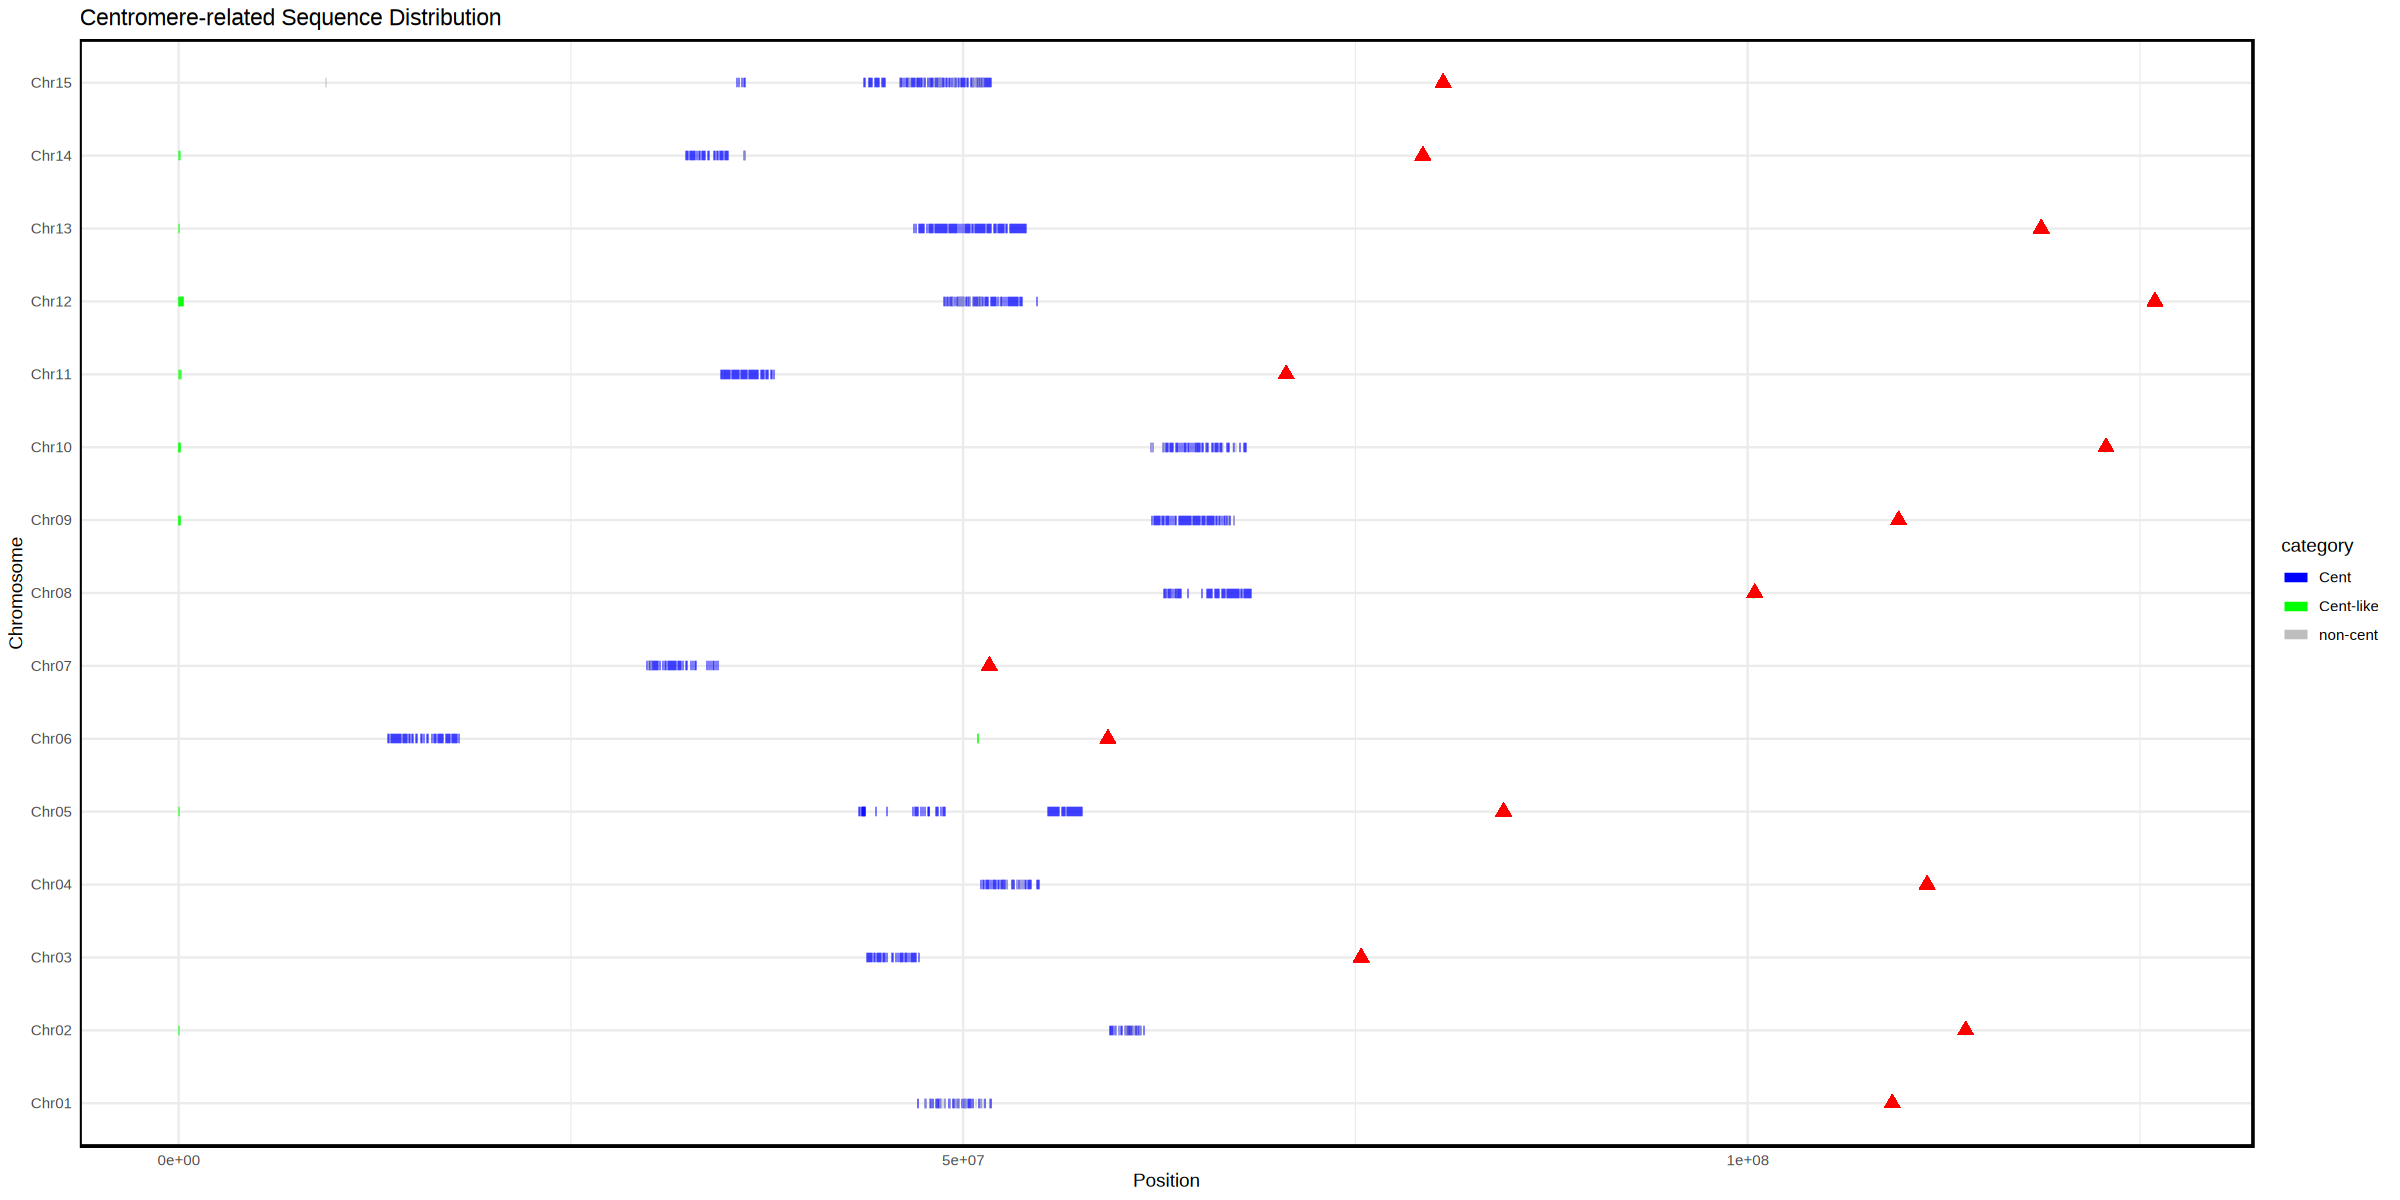

In [8]:
# library(ggplot2)
# library(dplyr)

# # 假设 `filtered_df` 已经经过前面的处理，包含分类和染色体长度信息
# # 绘制每个染色体的分布图，并标注末端
# options(repr.plot.width=20, repr.plot.height=10)

# ggplot(filtered_df) +
#   geom_segment(aes(x = start, xend = end, y = Chr, yend = Chr, color = category), size = 2) + 
#   geom_point(aes(x = chr_length.x, y = Chr), shape = 17, color = "red", size = 3) + # 标注末端
#   scale_color_manual(values = c("Cent" = "blue", "Cent-like" = "green", "non-cent" = "grey")) +
#   theme_minimal() +
#   labs(title = "Centromere-related Sequence Distribution", x = "Position", y = "Chromosome") +
#   theme(panel.border = element_rect(color = "black", fill = NA, size = 1)) # 添加边框